# CS532 Cloud Computing Systems - Semester Project

# A web diagnostic assistant using Machine Learning Algorithms
# Part 1: Data Analysis and Machine Learning Model Implementation

Developer: Chu-An Tsai

This is the part of data analysis and machines learning algorithms implementation in the web diagnostic assistant. After evaluating all the models, the best one (high accuracy and low false negative rate) will be saved and used for the prediction in the web application. 

# Import libraries

In [333]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import mean_squared_error, classification_report, confusion_matrix, precision_recall_curve, auc, roc_curve

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import *
from dataprep.eda.missing import plot_missing
from dataprep.eda import plot_correlation

sns.set(context='notebook', style='darkgrid', palette='colorblind', font='sans-serif', font_scale=1, rc=None)
matplotlib.rcParams['figure.figsize'] = [8,8]
matplotlib.rcParams.update({'font.size': 15})
matplotlib.rcParams['font.family'] = 'sans-serif'

# Data analysis

In [334]:
covid_data = pd.read_csv('Covid.csv')
covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,...,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,...,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,...,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,...,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,...,No,Yes,No,Yes,No,Yes,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,Yes,Yes,No,Yes,Yes,Yes,Yes,No,No,No,...,Yes,Yes,No,No,No,No,No,No,No,Yes
5430,Yes,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,...,Yes,No,No,No,No,No,No,No,No,Yes
5431,Yes,Yes,Yes,No,No,No,No,No,Yes,No,...,No,No,No,No,No,No,No,No,No,No
5432,Yes,Yes,Yes,No,Yes,No,No,Yes,Yes,No,...,No,No,No,No,No,No,No,No,No,No


In [335]:
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5434 entries, 0 to 5433
Data columns (total 21 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Breathing Problem                        5434 non-null   object
 1   Fever                                    5434 non-null   object
 2   Dry Cough                                5434 non-null   object
 3   Sore throat                              5434 non-null   object
 4   Running Nose                             5434 non-null   object
 5   Asthma                                   5434 non-null   object
 6   Chronic Lung Disease                     5434 non-null   object
 7   Headache                                 5434 non-null   object
 8   Heart Disease                            5434 non-null   object
 9   Diabetes                                 5434 non-null   object
 10  Hyper Tension                            5434 non-null   obj

In [336]:
missing_values = covid_data.isnull().sum() 

percent_missing = covid_data.isnull().sum()/covid_data.shape[0]*100 

value = {
    'missing_counts ':missing_values,
    'percent %':percent_missing  
}
covid_data_frame = pd.DataFrame(value)
covid_data_frame

,missing_counts,percent %
Breathing Problem,0,0.0
Fever,0,0.0
Dry Cough,0,0.0
Sore throat,0,0.0
Running Nose,0,0.0
Asthma,0,0.0
Chronic Lung Disease,0,0.0
Headache,0,0.0
Heart Disease,0,0.0
Diabetes,0,0.0


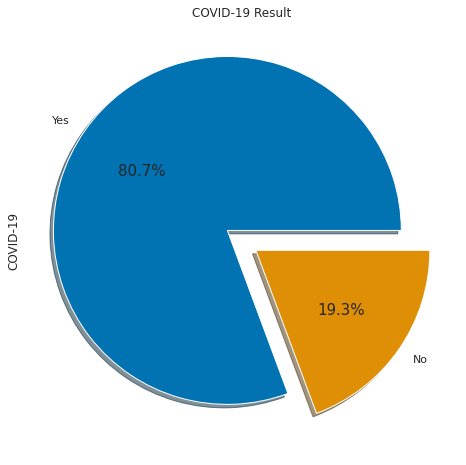

In [337]:
covid_data["COVID-19"].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.1f%%', shadow=True)
plt.title('COVID-19 Result');


<AxesSubplot:xlabel='Breathing Problem', ylabel='count'>

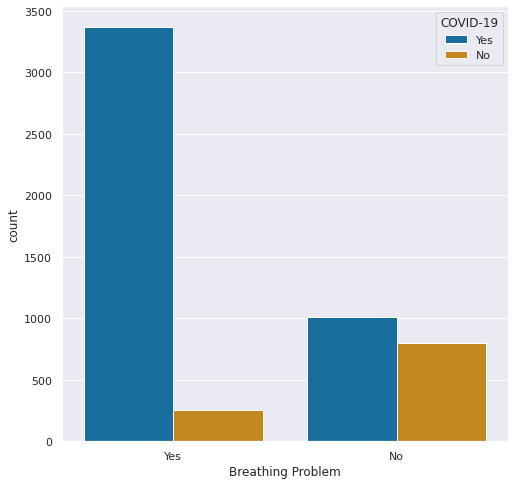

In [338]:
sns.countplot(x='Breathing Problem', hue='COVID-19', data=covid_data)

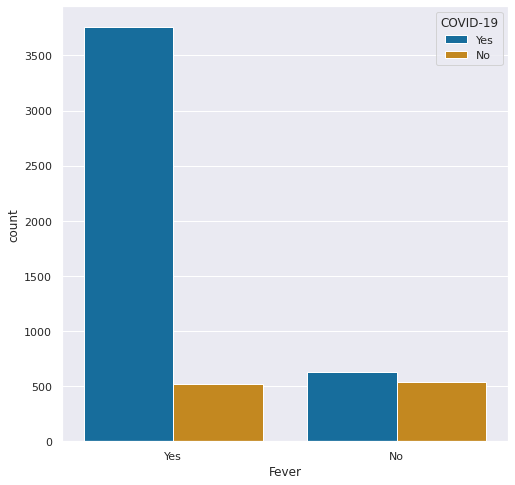

In [339]:
sns.countplot(x='Fever', hue='COVID-19', data=covid_data);

<AxesSubplot:xlabel='Dry Cough', ylabel='count'>

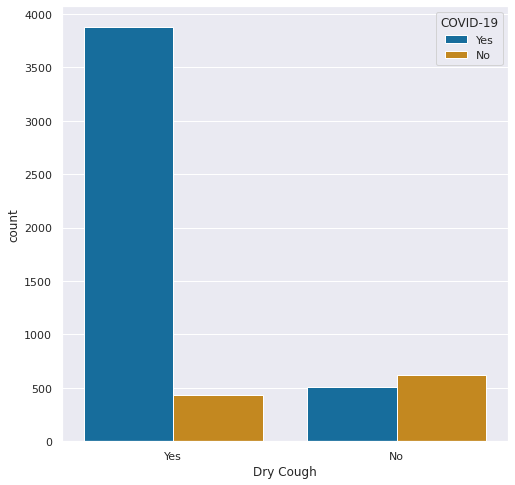

In [340]:
sns.countplot(x='Dry Cough', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Sore throat', ylabel='count'>

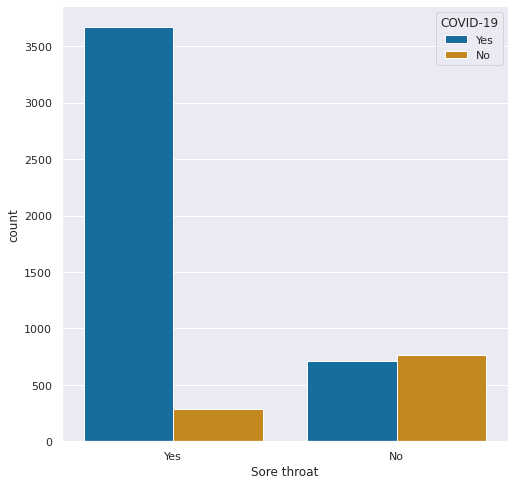

In [341]:
sns.countplot(x='Sore throat', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Running Nose', ylabel='count'>

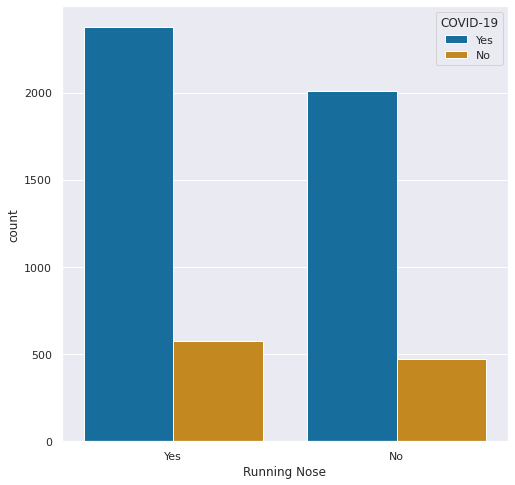

In [342]:
sns.countplot(x='Running Nose', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Abroad travel', ylabel='count'>

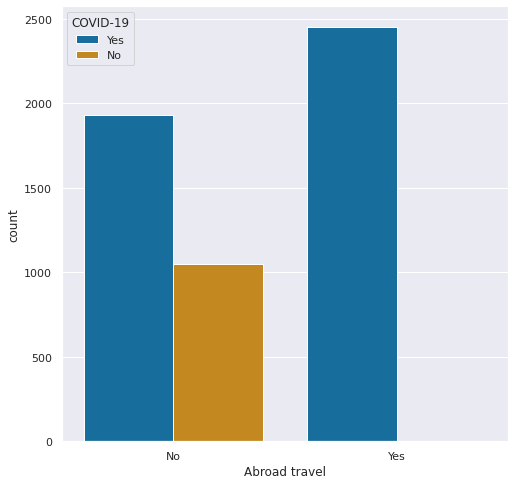

In [343]:
sns.countplot(x='Abroad travel', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Contact with COVID Patient', ylabel='count'>

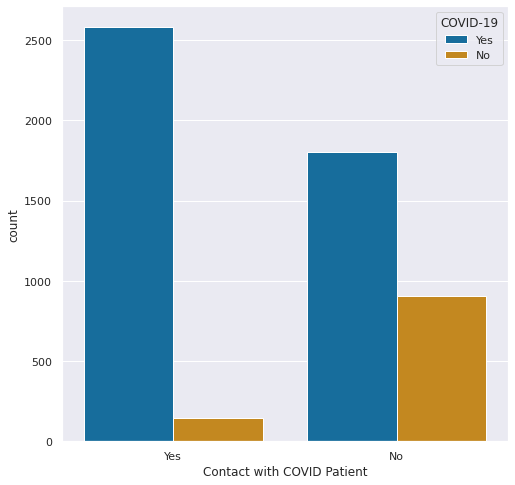

In [344]:
sns.countplot(x='Contact with COVID Patient', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Attended Large Gathering', ylabel='count'>

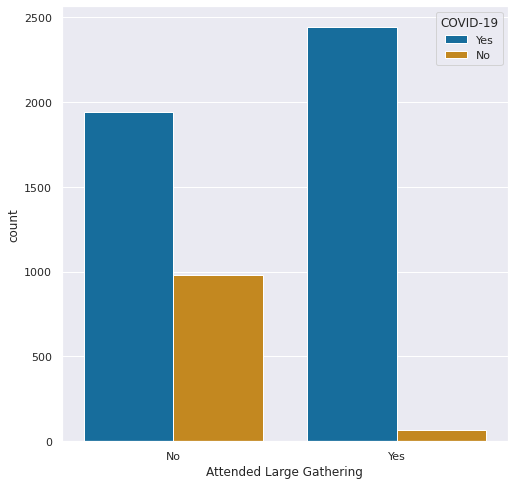

In [345]:
sns.countplot(x='Attended Large Gathering', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Visited Public Exposed Places', ylabel='count'>

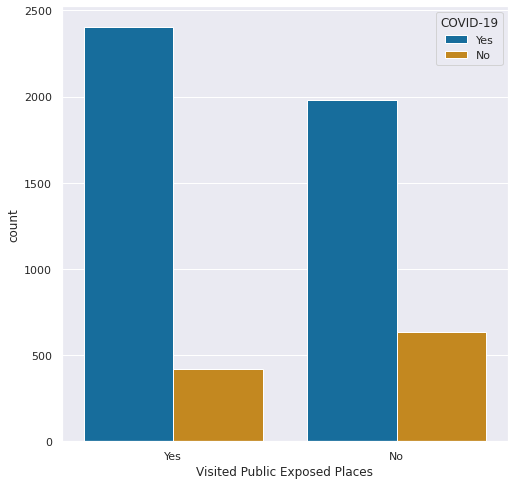

In [346]:
sns.countplot(x='Visited Public Exposed Places', hue='COVID-19', data=covid_data)

<AxesSubplot:xlabel='Family working in Public Exposed Places', ylabel='count'>

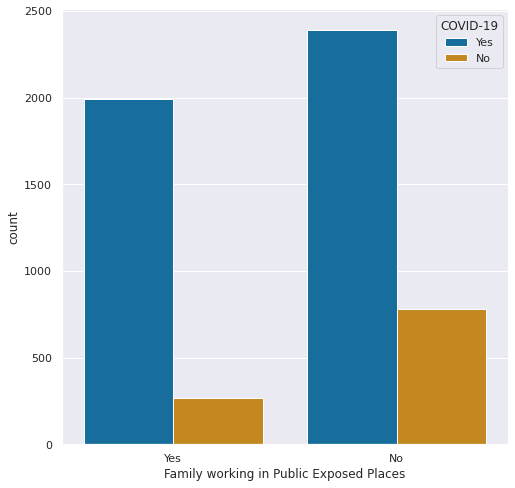

In [347]:
sns.countplot(x='Family working in Public Exposed Places', hue='COVID-19', data=covid_data)

In [348]:
# Do label encoding for fitting ML algorithms
label_encoder = LabelEncoder()
s = (covid_data.dtypes == 'object')
object_cols = list(s[s].index)

label_covid_data = covid_data.copy()
for col in object_cols:
    label_covid_data[col] = label_encoder.fit_transform(label_data[col])
label_covid_data

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,...,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
0,1,1,1,1,1,0,0,0,0,1,...,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,...,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,...,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,...,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,...,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5429,1,1,0,1,1,1,1,0,0,0,...,1,1,0,0,0,0,0,0,0,1
5430,1,1,1,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,0,0,1
5431,1,1,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5432,1,1,1,0,1,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [349]:
# correlation map
corr = label_covid_data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,Wearing Masks,Sanitization from Market,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,nan,nan,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,nan,nan,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,nan,nan,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,nan,nan,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,nan,nan,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,nan,nan,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,nan,nan,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,nan,nan,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,nan,nan,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,nan,nan,0.040627


In [350]:
# Drop two colmuns that have one value in this dataset
label_covid_data = label_covid_data.drop('Wearing Masks',axis=1)
label_covid_data = label_covid_data.drop('Sanitization from Market',axis=1)

In [351]:
corr = label_covid_data.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None)

,Breathing Problem,Fever,Dry Cough,Sore throat,Running Nose,Asthma,Chronic Lung Disease,Headache,Heart Disease,Diabetes,Hyper Tension,Fatigue,Gastrointestinal,Abroad travel,Contact with COVID Patient,Attended Large Gathering,Visited Public Exposed Places,Family working in Public Exposed Places,COVID-19
Breathing Problem,1.000000,0.089903,0.159562,0.303768,0.055190,0.075318,-0.098291,-0.062172,-0.073366,0.055427,0.045256,0.000561,-0.075390,0.117795,0.214634,0.200304,0.066688,0.018295,0.443764
Fever,0.089903,1.000000,0.127580,0.322235,0.081758,0.073953,-0.025160,-0.035416,-0.031462,0.050286,0.079001,-0.060458,-0.008067,0.128726,0.164704,0.070490,0.002252,0.012102,0.352891
Dry Cough,0.159562,0.127580,1.000000,0.213907,-0.030763,0.086843,-0.043664,-0.035912,0.047566,-0.006593,0.081989,-0.039909,0.008251,0.331418,0.128330,0.117963,0.086176,0.163102,0.464292
Sore throat,0.303768,0.322235,0.213907,1.000000,0.039450,0.081377,-0.050440,-0.015971,0.002177,0.001938,0.042811,-0.023290,0.025886,0.205986,0.189251,0.216438,0.079055,0.104378,0.502848
Running Nose,0.055190,0.081758,-0.030763,0.039450,1.000000,-0.022763,-0.014376,0.068479,-0.056750,0.042961,-0.020445,0.007026,-0.014673,0.034526,0.003776,0.061099,0.032568,-0.061323,-0.005657
Asthma,0.075318,0.073953,0.086843,0.081377,-0.022763,1.000000,-0.033771,0.037064,0.076783,-0.012060,0.017707,0.006564,0.101909,0.068286,0.005046,-0.044592,0.020941,-0.115679,0.089930
Chronic Lung Disease,-0.098291,-0.025160,-0.043664,-0.050440,-0.014376,-0.033771,1.000000,-0.050480,-0.039860,0.046789,-0.010331,-0.047655,-0.050333,-0.088854,-0.062482,-0.020548,-0.093049,0.038343,-0.056837
Headache,-0.062172,-0.035416,-0.035912,-0.015971,0.068479,0.037064,-0.050480,1.000000,0.048471,0.032390,-0.207489,0.052035,0.097778,0.043589,-0.082101,-0.162992,-0.005790,-0.012625,-0.027793
Heart Disease,-0.073366,-0.031462,0.047566,0.002177,-0.056750,0.076783,-0.039860,0.048471,1.000000,-0.032956,0.049139,-0.058925,0.004121,-0.020761,-0.025593,-0.045437,0.086169,0.035000,0.027072
Diabetes,0.055427,0.050286,-0.006593,0.001938,0.042961,-0.012060,0.046789,0.032390,-0.032956,1.000000,0.042543,-0.043903,0.040651,0.039013,-0.085696,-0.061650,-0.078212,0.097696,0.040627


# ML algorithms implementation

In [352]:
X = label_covid_data.drop('COVID-19',axis=1)
y = label_covid_data['COVID-19']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=532)

# 1. Logistic Regression

In [353]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(random_state=532)
lgr.fit(x_train, y_train)
lgr_pred = model_lgr.predict(x_test)

print("Confusion metrix:\n", confusion_matrix(y_test, lgr_pred))
tn, fp, fn, tp = confusion_matrix(y_test, lgr_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
fnr_lgr = (fn/(fn+tp)).round(4)
print("False Negative Rate:", fnr_lgr)

rep_lgr = classification_report(y_test, lgr_pred)
acc_lgr = accuracy_score(y_test, lgr_pred)

print('\nClassification report:')
print(rep_lgr)

# 5-fold cross validation
lgr_mean_acc = cross_val_score(lgr, X, y, cv=5).mean()
print("5-fold cross validation score: ", lgr_mean_acc.round(4))

Confusion metrix:
 [[ 382   43]
 [  22 1727]]

TN:  382 
FP:  43 
FN:  22 
TP:  1727
False Negative Rate: 0.0126

Classification report:
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       425
           1       0.98      0.99      0.98      1749

    accuracy                           0.97      2174
   macro avg       0.96      0.94      0.95      2174
weighted avg       0.97      0.97      0.97      2174

5-fold cross validation score:  0.9185


# 2. Decision Tree

In [354]:
from sklearn import tree
tr = tree.DecisionTreeClassifier(random_state=532)
tr.fit(x_train, y_train)
tr_pred = tr.predict(x_test)

print("Confusion metrix:\n", confusion_matrix(y_test, tr_pred))
tn, fp, fn, tp = confusion_matrix(y_test, tr_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
fnr_tr = (fn/(fn+tp)).round(4)
print("False Negative Rate:", fnr_tr)

rep_tr = classification_report(y_test, tr_pred)
acc_tr = accuracy_score(y_test, tr_pred)

print('\nClassification report:')
print(rep_tr)

# 5-fold cross validation
tr_mean_acc = cross_val_score(tr, X, y, cv=5).mean()
print("5-fold cross validation score: ", tr_mean_acc.round(4))

Confusion metrix:
 [[ 417    8]
 [  30 1719]]

TN:  417 
FP:  8 
FN:  30 
TP:  1719
False Negative Rate: 0.0172

Classification report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       425
           1       1.00      0.98      0.99      1749

    accuracy                           0.98      2174
   macro avg       0.96      0.98      0.97      2174
weighted avg       0.98      0.98      0.98      2174

5-fold cross validation score:  0.8408


# 3. K-Nearest Keighbors

In [355]:
from sklearn.neighbors import KNeighborsClassifier

'''
# Parameter tuning, get the best k
k = [5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]
for k in n:
    model_knn = KNeighborsClassifier(n_neighbors=k)

    knn_mean_acc = cross_val_score(model_knn, X, y, cv=5).mean()
    print("n = ", k, ",acc = ",knn_mean_acc)
'''
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(x_train, y_train)
knn_pred = knn.predict(x_test)

print("Confusion metrix:\n", confusion_matrix(y_test, knn_pred))
tn, fp, fn, tp = confusion_matrix(y_test, knn_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
fnr_knn = (fn/(fn+tp)).round(4)
print("False Negative Rate:", fnr_knn)

rep_knn = classification_report(y_test, knn_pred)
acc_knn = accuracy_score(y_test, knn_pred)

print('\nClassification report:')
print(rep_knn)

# 5-fold cross validation
knn_mean_acc = cross_val_score(knn, X, y, cv=5).mean()
print("5-fold cross validation score: ",knn_mean_acc.round(4))

Confusion metrix:
 [[ 346   79]
 [  34 1715]]

TN:  346 
FP:  79 
FN:  34 
TP:  1715
False Negative Rate: 0.0194

Classification report:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86       425
           1       0.96      0.98      0.97      1749

    accuracy                           0.95      2174
   macro avg       0.93      0.90      0.91      2174
weighted avg       0.95      0.95      0.95      2174

5-fold cross validation score:  0.9168


# 4. Random Forest

In [356]:
from sklearn.ensemble import RandomForestClassifier
rfr = RandomForestClassifier(n_estimators=890, random_state=532)
rfr.fit(x_train, y_train)
rfr_pred = rfr.predict(x_test)

print("Confusion metrix:\n", confusion_matrix(y_test, rfr_pred))
tn, fp, fn, tp = confusion_matrix(y_test, rfr_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
fnr_rfr = (fn/(fn+tp)).round(4)
print("False Negative Rate:", fnr_rfr)

rep_rfr = classification_report(y_test, rfr_pred)
acc_rfr = accuracy_score(y_test, rfr_pred)

print('\nClassification report:')
print(rep_rfr)

# 5-fold cross validation
rfr_mean_acc = cross_val_score(rfr, X, y, cv=5).mean()
print("5-fold cross validation score: ", rfr_mean_acc.round(4))

Confusion metrix:
 [[ 408   17]
 [  27 1722]]

TN:  408 
FP:  17 
FN:  27 
TP:  1722
False Negative Rate: 0.0154

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       425
           1       0.99      0.98      0.99      1749

    accuracy                           0.98      2174
   macro avg       0.96      0.97      0.97      2174
weighted avg       0.98      0.98      0.98      2174

5-fold cross validation score:  0.9034


# 5. Naive Bayes

In [357]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(x_train, y_train)
nb_pred = nb.predict(x_test)

print("Confusion metrix:\n", confusion_matrix(y_test, nb_pred))
tn, fp, fn, tp = confusion_matrix(y_test, nb_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
fnr_nb = (fn/(fn+tp)).round(4)
print("False Negative Rate:", fnr_nb)

rep_nb = classification_report(y_test, nb_pred)
acc_nb = accuracy_score(y_test, nb_pred)

print('\nClassification report:')
print(rep_nb)

# 5-fold cross validation
nb_mean_acc = cross_val_score(nb, X, y, cv=5).mean()
print("5-fold cross validation score: ", nb_mean_acc.round(4))

Confusion metrix:
 [[ 425    0]
 [ 584 1165]]

TN:  425 
FP:  0 
FN:  584 
TP:  1165
False Negative Rate: 0.3339

Classification report:
              precision    recall  f1-score   support

           0       0.42      1.00      0.59       425
           1       1.00      0.67      0.80      1749

    accuracy                           0.73      2174
   macro avg       0.71      0.83      0.70      2174
weighted avg       0.89      0.73      0.76      2174

5-fold cross validation score:  0.7486


# 6. Support Vector Machines

In [358]:
from sklearn import svm
clf = svm.SVC(kernel='linear') 
clf.fit(x_train, y_train)
clf_pred = clf.predict(x_test)

print("Confusion metrix:\n", confusion_matrix(y_test, clf_pred))
tn, fp, fn, tp = confusion_matrix(y_test, clf_pred).ravel()
print("\nTN: ", tn,"\nFP: ", fp,"\nFN: ", fn,"\nTP: ", tp)
fnr_clf = (fn/(fn+tp)).round(4)
print("False Negative Rate:", fnr_clf)

rep_clf = classification_report(y_test, clf_pred)
acc_clf = accuracy_score(y_test, clf_pred)

print('\nClassification report:')
print(rep_clf)

# 5-fold cross validation
clf_mean_acc = cross_val_score(clf, X, y, cv=5).mean()
print("5-fold cross validation score: ", clf_mean_acc.round(4))

Confusion metrix:
 [[ 382   43]
 [  24 1725]]

TN:  382 
FP:  43 
FN:  24 
TP:  1725
False Negative Rate: 0.0137

Classification report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       425
           1       0.98      0.99      0.98      1749

    accuracy                           0.97      2174
   macro avg       0.96      0.94      0.95      2174
weighted avg       0.97      0.97      0.97      2174

5-fold cross validation score:  0.9085


# Model Evaluation

In [359]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'K-Nearest Neighbors', 'Random Forest', 
              'Naive Bayes', 'Support Vector Machines'],
    'Score': [acc_lgr, acc_tr, acc_knn, acc_rfr, acc_nb, acc_clf],
    'FNR': [fnr_lgr, fnr_tr, fnr_knn, fnr_rfr, fnr_nb, fnr_clf, ]
})
models.sort_values(by='FNR', ascending=True)

,Model,Score,FNR
0,Logistic Regression,0.970101,0.0126
5,Support Vector Machines,0.969181,0.0137
3,Random Forest,0.979761,0.0154
1,Decision Tree,0.982521,0.0172
2,K-Nearest Neighbors,0.948022,0.0194
4,Naive Bayes,0.731371,0.3339


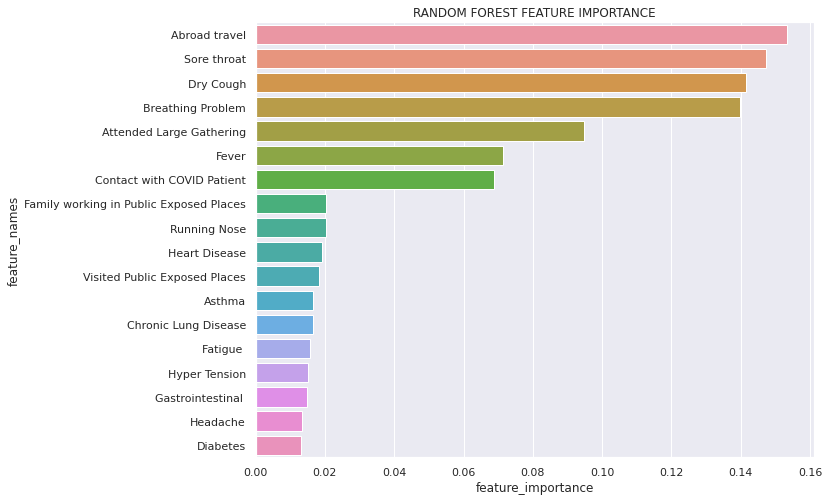

In [360]:
'''
s = (label_covid_data.dtypes == 'object')
object_cols = list(s[s].index)
features = label_covid_data[object_cols]
sorted_idx = rfr.feature_importances_.argsort()
plt.barh(features, rfr.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")
'''
def plot_feature_importance(importance,names,model_type):

    #Create arrays from feature importance and feature names
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    #Create a DataFrame using a Dictionary
    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    #Sort the DataFrame in order decreasing feature importance
    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

    #Define size of bar plot
    plt.figure(figsize=(10,8))
    #Plot Searborn bar chart
    sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
    #Add chart labels
    plt.title(model_type + ' FEATURE IMPORTANCE')
    #plt.xlabel("IMPORTANCE")
    #plt.ylabel("FEATURE NAMES")
    
plot_feature_importance(rfr.feature_importances_,X.columns,'RANDOM FOREST')

# Save the model for the Web App

In [361]:
# Save the model as serialized object pickle
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump(lgr, file)